# Import lib

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from scipy.linalg import sqrtm,logm
import seaborn as sns
#%matplotlib widget
#%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
#from sklearn_extra.cluster import KMedoids
from sklearn.metrics import classification_report
#!pip install scikit-learn-extra
#from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


In [2]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# Load parameters

In [3]:
from Human_parameters import human_param
from Mice_parameters import mice_param

In [4]:
p = human_param()
p_mice = mice_param()

In [5]:
len(p_mice['Old_Control_mice'])

5

# Extract data according to required sleep stage

In [6]:
from Extract_human_data import extract_human_data
from Extract_mice_data import extract_mice_sleepdata

In [7]:
for i in p['data']:
    print('Loading {}...................'.format(i))
    vars()[i+'_Control'],vars()[i+'_Control_sleep_label'],vars()[i+'_Control_human'],vars()[i+'_no_data_Control'] = extract_human_data(p,'Control',i)
    vars()[i+'_Tbi'],vars()[i+'_Tbi_sleep_label'],vars()[i+'_Tbi_human'],vars()[i+'_no_data_Tbi'] = extract_human_data(p,'Tbi',i)

Control_datasets=[x + '_Control' for x in p['data']]
Control_dataset_sleep_label=[x + '_Control_sleep_label' for x in p['data']]
Control_dataset_human=[x + '_Control_human' for x in p['data']]
Control={}
Control_sleep_label={}
Control_human=[]
for i in range(len(Control_datasets)):
    Control={**Control,**globals()[Control_datasets[i]]}
    Control_sleep_label={**Control_sleep_label,**globals()[Control_dataset_sleep_label[i]]}
    Control_human.extend(globals()[Control_dataset_human[i]])
    
Tbi_datasets=[x + '_Tbi' for x in p['data']]
Tbi_dataset_sleep_label=[x + '_Tbi_sleep_label' for x in p['data']]
Tbi_dataset_human=[x + '_Tbi_human' for x in p['data']]
Tbi={}
Tbi_sleep_label={}
Tbi_human=[]
for i in range(len(Tbi_datasets)):
    Tbi={**Tbi,**globals()[Tbi_datasets[i]]}
    Tbi_sleep_label={**Tbi_sleep_label,**globals()[Tbi_dataset_sleep_label[i]]}
    Tbi_human.extend(globals()[Tbi_dataset_human[i]])

Loading dataset1...................

Subject  102
Opening raw data file D:\final_human\data\102_ica.fif...
Isotrak not found
    Range : 0 ... 7485999 =      0.000 ... 37429.995 secs
Ready.
Reading 0 ... 7485999  =      0.000 ... 37429.995 secs...
(6, 7486000)
(6, 450000)

Subject  208
Opening raw data file D:\final_human\data\208_ica.fif...
Isotrak not found
    Range : 0 ... 4789599 =      0.000 ... 23947.995 secs
Ready.
Reading 0 ... 4789599  =      0.000 ... 23947.995 secs...
(6, 4789600)
(6, 996000)

Subject  457
Opening raw data file D:\final_human\data\457_ica.fif...
Isotrak not found
    Range : 0 ... 4614199 =      0.000 ... 23070.995 secs
Ready.
Reading 0 ... 4614199  =      0.000 ... 23070.995 secs...
(6, 4614200)
(6, 840000)

Subject  244
Opening raw data file D:\final_human\data\244_ica.fif...
Isotrak not found
    Range : 0 ... 5128799 =      0.000 ... 25643.995 secs
Ready.
Reading 0 ... 5128799  =      0.000 ... 25643.995 secs...
(6, 5128800)
(6, 1608000)

Subject  340
O

In [8]:
dataset1_Control['102'].shape

(6, 450000)

In [9]:
if p_mice['data_mice'] == 'old':
    print('Loading old mice data................')
    Control_data_mice,Control_mice,no_data_control_mice         =   extract_mice_sleepdata(p_mice['Old_Control_mice'],p_mice,'Control','old')
    Tbi_data_mice,Tbi_mice,no_data_tbi_mice                 =   extract_mice_sleepdata(p_mice['Old_Tbi_mice'],p_mice,'Tbi','old')
    print()
elif p_mice['data_mice'] == 'new':
    print('Loading new mice data................')
    Control_data_mice,Control_mice,no_data_control_mice         =   extract_mice_sleepdata(p_mice['New_Control_mice'],p_mice,'Control','new')
    Tbi_data_mice,Tbi_mice,no_data_tbi_mice                 =   extract_mice_sleepdata(p_mice['New_Tbi_mice'],p_mice,'Tbi','new')
    print()    
elif p_mice['data_mice'] == 'both':
    print('Loading old data................')
    Old_Control_data_mice,Old_Control_mice,old_no_data_control_mice         =   extract_mice_sleepdata(p_mice['Old_Control_mice'],p_mice,'Control','old')
    Old_Tbi_data_mice,Old_Tbi_mice,old_no_data_tbi_mice                 =   extract_mice_sleepdata(p_mice['Old_Tbi_mice'],p_mice,'Tbi','old')
    print()
    print('Loading new data................')
    New_Control_data_mice,New_Control_mice,new_no_data_control_mice         =   extract_mice_sleepdata(p_mice['New_Control_mice'],p_mice,'Control','new')
    New_Tbi_data_mice,New_Tbi_mice,new_no_data_tbi_mice                 =   extract_mice_sleepdata(p_mice['New_Tbi_mice'],p_mice,'Tbi','new')
    print()
    Control_data_mice={**Old_Control_data_mice,**New_Control_data_mice}
    Control_mice=Old_Control_mice+New_Control_mice
    no_data_control_mice=old_no_data_control_mice+new_no_data_control_mice
    Tbi_data_mice={**Old_Tbi_data_mice,**New_Tbi_data_mice}
    Tbi_mice=Old_Tbi_mice+New_Tbi_mice
    no_data_tbi_mice=old_no_data_tbi_mice+new_no_data_tbi_mice


Loading new mice data................

Subject # m010_TPE01_BaselineDay2_sham
Extracting EDF parameters from D:\final_mice\data\m010_TPE01_BaselineDay2_sham.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 21599999  =      0.000 ... 86399.996 secs...
Subject data shape  (1025024,)

Subject # m010_TPE03_BaselineDay2_sham
Extracting EDF parameters from D:\final_mice\data\m010_TPE03_BaselineDay2_sham.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 21599999  =      0.000 ... 86399.996 secs...
Subject data shape  (711680,)

Subject # m010_TPE06_BaselineDay2_sham
Extracting EDF parameters from D:\final_mice\data\m010_TPE06_BaselineDay2_sham.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 21599999  =      0.000 ... 86399.996 secs...
Subject data shape  (900096,)

Subject # m010_TPE08_BaselineDay2_sham
Extracting EDF parameters f

## Resample if necessary

In [ ]:
y=Control_data_mice['m010_TPE01_BaselineDay2_sham']

In [ ]:
y

In [ ]:
y=Control_data_mice['m010_TPE01_BaselineDay2_sham'][0]
print(len(y))
from scipy import signal
y_resample=signal.resample(y,int(len(y)*200/256))
print(len(y_resample))

In [ ]:
"""x=np.arange(0,len(y),1)
x_resample=np.arange(0,len(y),len(y)/len(y_resample))
%matplotlib notebook
plt.plot(x,y,'b', x_resample,y_resample,'r')
plt.show()"""

# create epochs of required length

In [10]:
from Create_epochs import create_epoch

In [11]:
print('Creating human epochs of length '+str(p['epoch_len'])+' sec..............')
Control_epoch_human  =    create_epoch(Control,p,'Control','human')
Tbi_epoch_human      =    create_epoch(Tbi,p,'Tbi','human')
print()

Creating human epochs of length 30 sec..............



In [12]:

print('Creating mice epochs of length '+str(p_mice['epoch_len'])+' sec..............')
Control_epoch_mice  =    create_epoch(Control_data_mice,p_mice,'Control','mice')
Tbi_epoch_mice      =    create_epoch(Tbi_data_mice,p_mice,'Tbi','mice')
print()

Creating mice epochs of length 28 sec..............



# remove epochs which contain artifact

In [13]:
from Artifact_removal import artifact_removal

In [14]:
print('Removing human epochs with artifacts.......')
Control_AR_human,min_control_human,Control_mask_human     =    artifact_removal(Control_epoch_human,p)
Tbi_AR_human,min_tbi_human,Tbi_mask_human     =    artifact_removal(Tbi_epoch_human,p)

min_dur_human=int(min(min_control_human,min_tbi_human)*p['epoch_len']/60)
print('Minimum duration human '+str(min_dur_human)+' min')
print()



Removing human epochs with artifacts.......
Minimum duration human 37 min



In [15]:
print('Removing mice epochs with artifacts.......')

Control_AR_mice,min_control_mice,Control_mask_mice     =    artifact_removal(Control_epoch_mice,p_mice)
Tbi_AR_mice,min_tbi_mice,Tbi_mask_mice     =    artifact_removal(Tbi_epoch_mice,p_mice)

min_dur_mice=int(min(min_control_mice,min_tbi_mice)*p_mice['epoch_len']/60)
print('Minimum duration mice '+str(min_dur_mice)+' min')
print()


Removing mice epochs with artifacts.......
Minimum duration mice 4 min



# create label for each epoch (0=Control,1=TBI)

In [16]:
# select epoch labels based on mask
def label_sel(data,mask):
    
    for i in data:
        data[i]=(np.delete(data[i][0:len(mask[i])],mask[i]))
    return data

In [17]:
Control_sleep_label=label_sel(Control_sleep_label,Control_mask_human)
Tbi_sleep_label=label_sel(Tbi_sleep_label,Tbi_mask_human)

In [18]:
# create epoch labels for mice 
def create_mice_label (data,p_mice,group):
    label = {}
    for i in data:
        if group == 'Control':
            label[i] = [p_mice['sleep_stage']+'0' for x in range(np.shape(data[i])[2])]
        elif group == 'Tbi':
            label[i] = [p_mice['sleep_stage']+'1' for x in range(np.shape(data[i])[2])]
        
    return label        

In [19]:
Control_mice_label = create_mice_label(Control_AR_mice,p_mice,'Control')
Tbi_mice_label = create_mice_label(Tbi_AR_mice,p_mice,'Tbi')

# select required data size

In [20]:
from Select_epochs import length_sel

In [21]:
if p['duration'] != 'NA' and p['duration']<min_dur_human:
    print('Choosing first '+str(p['duration'])+'min data from each human sub')
    Control_AR_human,Control_sleep_label     =    length_sel(Control_AR_human,Control_sleep_label,p)
    Tbi_AR_human,Tbi_sleep_label         =    length_sel(Tbi_AR_human,Tbi_sleep_label,p)
elif p['duration']>=min_dur_human:
    p['duration']=min_dur_human
    print('Choosing first '+str(p['duration'])+'min data from each human sub')
    Control_AR_human,Control_sleep_label     =    length_sel(Control_AR_human,Control_sleep_label,p)
    Tbi_AR_human,Tbi_sleep_label         =    length_sel(Tbi_AR_human,Tbi_sleep_label,p)


Choosing first 30min data from each human sub


In [22]:
if p_mice['duration'] != 'NA' and p_mice['duration']<min_dur_mice:
    print('Choosing first '+str(p_mice['duration'])+'min data from each mice sub')
    Control_AR_mice,Control_mice_label     =    length_sel(Control_AR_mice,Control_mice_label,p_mice)
    Tbi_AR_mice,Tbi_mice_label         =    length_sel(Tbi_AR_mice,Tbi_mice_label,p_mice)
elif p_mice['duration']>min_dur_mice:
    p_mice['duration']=min_dur_mice
    print('Choosing first '+str(p_mice['duration'])+'min data from each mice sub')
    Control_AR_mice,Control_mice_label     =    length_sel(Control_AR_mice,Control_mice_label,p_mice)
    Tbi_AR_mice,Tbi_mice_label         =    length_sel(Tbi_AR_mice,Tbi_mice_label,p_mice)
print()


Choosing first 4min data from each mice sub



# filter data to obtain clean data

In [23]:
from Frequency_filtering import freq_filt

In [24]:
p['freq_band']      =   'normal'
print('Filtering human epochs in '+p['freq_band']+' range ............')
Control_filtered_human  =    freq_filt(Control_AR_human,p,'Control','human')
Tbi_filtered_human      =    freq_filt(Tbi_AR_human,p,'Tbi','human')  
print()


Filtering human epochs in normal range ............



In [25]:
p_mice['freq_band']      =   'normal'
print('Filtering mice epochs in '+p_mice['freq_band']+' range ............')
Control_filtered_mice  =    freq_filt(Control_AR_mice,p_mice,'Control','mice')
Tbi_filtered_mice      =    freq_filt(Tbi_AR_mice,p_mice,'Tbi','mice')  
print()


Filtering mice epochs in normal range ............



# ----------------------

# Final variables

### Control_filtered_human,Control_sleep_label
### Tbi_filtered_human,Tbi_sleep_label
### Control_filtered_mice,Control_mice_label
### Tbi_filtered_mice,Tbi_mice_label

### All of the above variables are dictionaries with key being the subject's name. Shape of individual subject's data = (no. of electrodes, length of each epoch\*sampling freq, no. of epochs)

In [26]:
np.shape(Control_filtered_human['102'])

(6, 6000, 60)

In [27]:
np.shape(Control_sleep_label['102'])

(60,)

# ------------------------------------------------------------------

# Calculate spectral features 

In [28]:
from Spectral_features import feature_spectral

In [29]:
print('Calculating spectral features human.........')
Control_filtered_data_human,Control_BP_human,Control_RP_human,Control_SF_human,Control_spec_ent_human,Control_FAA_human,Control_PAC_human  =    feature_spectral(Control_filtered_human,p,'Control','human')
Tbi_filtered_data_human,Tbi_BP_human,Tbi_RP_human,Tbi_SF_human,Tbi_spec_ent_human,Tbi_FAA_human,Tbi_PAC_human      =    feature_spectral(Tbi_filtered_human,p,'Tbi','human')   
print()

Calculating spectral features human.........



In [30]:
print('Calculating spectral features mice.........')
Control_filtered_data_mice,Control_BP_mice,Control_RP_mice,Control_SF_mice,Control_spec_ent_mice,Control_FAA_mice,Control_PAC_mice  =    feature_spectral(Control_filtered_mice,p_mice,'Control','mice')
Tbi_filtered_data_mice,Tbi_BP_mice,Tbi_RP_mice,Tbi_SF_mice,Tbi_spec_ent_mice,Tbi_FAA_mice,Tbi_PAC_mice      =    feature_spectral(Tbi_filtered_mice,p_mice,'Tbi','mice')   
print()

Calculating spectral features mice.........



# Calculate connectivity features

In [31]:
from Connectivity_features import feature_connectivity

In [32]:
# choose frequency bands of interest 
freq_band=['delta','theta','alpha','sigma','beta','gama']

In [33]:
print('Calculating connectivity features human.........')
Control_coh_human,Control_phase_syn_human  =    feature_connectivity(Control_filtered_human,p,'Control','human',Control_filtered_data_human,freq_band)
Tbi_coh_human,Tbi_phase_syn_human      =    feature_connectivity(Tbi_filtered_human,p,'Tbi','human',Tbi_filtered_data_human,freq_band)
print()
# [F4_F3,C3_F3,C3_F4,C4_F3,C4_F4,C4_C3,O1_F3,O1_F4,O1_C3,O1_C4,O2_F3,O2_F4,O2_C3,O2_C4,O2_O1]

Calculating connectivity features human.........



# Calculate non-linear features

In [34]:
from Nonlinear_features import feature_nonlin

In [35]:
print('Calculating Non-linear features human...........')
Activity_Control_human,Mobility_Control_human,Complexity_Control_human  =    feature_nonlin(Control_filtered_data_human,p,freq_band,'human')
Activity_Tbi_human,Mobility_Tbi_human,Complexity_Tbi_human     =    feature_nonlin(Tbi_filtered_data_human,p,freq_band,'human')
print()

Calculating Non-linear features human...........



In [36]:
print('Calculating Non-linear features mice...........')
Activity_Control_mice,Mobility_Control_mice,Complexity_Control_mice  =    feature_nonlin(Control_filtered_data_mice,p_mice,freq_band,'mice')
Activity_Tbi_mice,Mobility_Tbi_mice,Complexity_Tbi_mice     =    feature_nonlin(Tbi_filtered_data_mice,p_mice,freq_band,'mice')
print()


Calculating Non-linear features mice...........



# Plot features

In [37]:
from Feature_plots import plots

Extracting EDF parameters from D:\final_human\data\244.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5128799  =      0.000 ... 25643.995 secs...
Opening raw data file D:\final_human\data\244_ica.fif...
Isotrak not found
    Range : 0 ... 5128799 =      0.000 ... 25643.995 secs
Ready.
Reading 0 ... 5128799  =      0.000 ... 25643.995 secs...


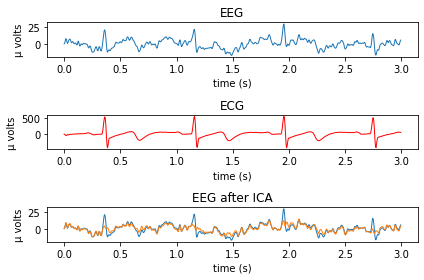

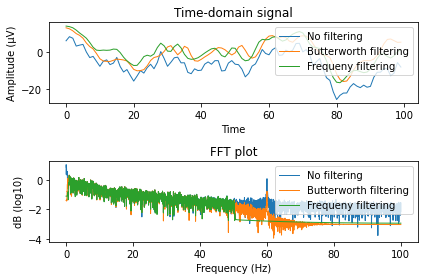

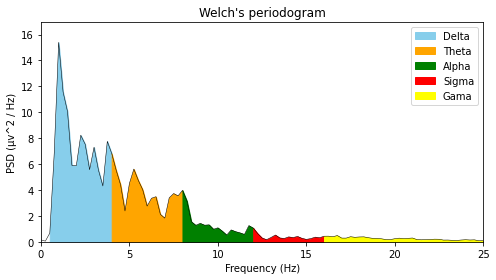

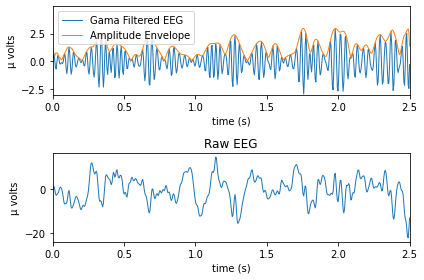

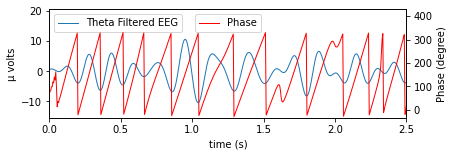

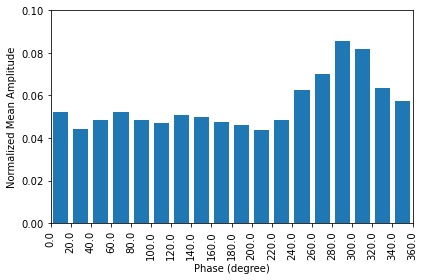

In [38]:
p['fs']=p['dataset1_fsh']
plots('244',Tbi_filtered_human['244'][0,:,0],Tbi_AR_human['244'][0,:,0],p)


# Organize data into table

In [39]:
from Create_table import create_table

In [40]:
print('Creating human dataframe.........................')
Control_frame_human  =    create_table(Control_BP_human,Control_RP_human,Control_SF_human,Control_spec_ent_human,Control_FAA_human,Control_PAC_human,Activity_Control_human,Mobility_Control_human,Complexity_Control_human,Control_human,freq_band,Control_sleep_label,p,'human',Control_coh_human,Control_phase_syn_human)
Tbi_frame_human     =    create_table(Tbi_BP_human,Tbi_RP_human,Tbi_SF_human,Tbi_spec_ent_human,Tbi_FAA_human,Tbi_PAC_human,Activity_Tbi_human,Mobility_Tbi_human,Complexity_Tbi_human,Tbi_human,freq_band,Tbi_sleep_label,p,'human',Tbi_coh_human,Tbi_phase_syn_human)
print()

Creating human dataframe.........................



In [41]:
print('Creating mice dataframe.........................')
Control_frame_mice  =    create_table(Control_BP_mice,Control_RP_mice,Control_SF_mice,Control_spec_ent_mice,Control_FAA_mice,Control_PAC_mice,Activity_Control_mice,Mobility_Control_mice,Complexity_Control_mice,Control_mice,freq_band,Control_mice_label,p_mice,'mice')
Tbi_frame_mice     =    create_table(Tbi_BP_mice,Tbi_RP_mice,Tbi_SF_mice,Tbi_spec_ent_mice,Tbi_FAA_mice,Tbi_PAC_mice,Activity_Tbi_mice,Mobility_Tbi_mice,Complexity_Tbi_mice,Tbi_mice,freq_band,Tbi_mice_label,p_mice,'mice')
print()


Creating mice dataframe.........................



# Age regression on human data

In [42]:
from Age_regression import age_reg_control_human,age_reg_tbi_human

In [43]:
# Call age regression
Total_control_dataframe_human=pd.DataFrame()

for i in (Control_frame_human):
    Total_control_dataframe_human = Total_control_dataframe_human.append(Control_frame_human[i], ignore_index = True) 

Total_tbi_dataframe_human=pd.DataFrame()
    
for i in (Tbi_frame_human):
    Total_tbi_dataframe_human = Total_tbi_dataframe_human.append(Tbi_frame_human[i], ignore_index = True) 

if p['age_regg'] == 'Y':
    print('Perform age regression human..................')
    Total_control_dataframe_human,slop_human,yintercept_human=age_reg_control_human(Total_control_dataframe_human)
    Total_tbi_dataframe_human=age_reg_tbi_human(Total_tbi_dataframe_human,slop_human,yintercept_human)
    print()

Total_dataframe_human = Total_control_dataframe_human.append(Total_tbi_dataframe_human, ignore_index = True) 


Perform age regression human..................



In [44]:
# format mice data
Total_control_dataframe_mice=pd.DataFrame()

for i in (Control_frame_mice):
    Total_control_dataframe_mice = Total_control_dataframe_mice.append(Control_frame_mice[i], ignore_index = True) 

Total_tbi_dataframe_mice=pd.DataFrame()
    
for i in (Tbi_frame_mice):
    Total_tbi_dataframe_mice = Total_tbi_dataframe_mice.append(Tbi_frame_mice[i], ignore_index = True) 

Total_dataframe_mice = Total_control_dataframe_mice.append(Total_tbi_dataframe_mice, ignore_index = True) 


In [45]:
if p['max_features'] > (len(Total_dataframe_human.columns)-1):
    No_fea_sel_human = 0
    print('No Feature Selection in humans')
else:
    No_fea_sel_human = 0
    #print("No. of features = %d"%(p_human['max_features']))


In [46]:

sub_human={}
for i in range(len(Control_human)):
    sub_human[Control_human[i]]=Total_dataframe_human.iloc[i*p['duration']*int(60/p['epoch_len']):i*p['duration']*int(60/p['epoch_len'])+p['duration']*int(60/p['epoch_len'])]
for j in range(len(Tbi_human)):
    sub_human[Tbi_human[j]]=Total_dataframe_human.iloc[(i+j+1)*p['duration']*int(60/p['epoch_len']):(i+j+1)*p['duration']*int(60/p['epoch_len'])+p['duration']*int(60/p['epoch_len'])]


In [47]:
sub_mice={}
for i in range(len(Control_mice)):
    sub_mice[Control_mice[i]]=Total_dataframe_mice.iloc[i*p_mice['duration']*int(60/p_mice['epoch_len']):i*p_mice['duration']*int(60/p_mice['epoch_len'])+p_mice['duration']*int(60/p_mice['epoch_len'])]
for j in range(len(Tbi_mice)):
    sub_mice[Tbi_mice[j]]=Total_dataframe_mice.iloc[(i+j+1)*p_mice['duration']*int(60/p_mice['epoch_len']):(i+j+1)*p_mice['duration']*int(60/p_mice['epoch_len'])+p_mice['duration']*int(60/p_mice['epoch_len'])]


# Apply machine learning

In [48]:
from Random_sampling import RS
from Independent_validation import IV

In [49]:
Random_training,Random_Y = RS(Total_dataframe_human,p)

No. of features = 26
Random Sampling 10 fold CV
RS dtree accuracy 95.83 (+/-2.15)
RS k5 accuracy 100.00 (+/-0.00)
RS k11 accuracy 99.86 (+/-0.42)
RS k19 accuracy 99.86 (+/-0.42)
RS RF accuracy 99.86 (+/-0.42)
RS SVM accuracy 100.00 (+/-0.00)
RS XGBoost accuracy 98.89 (+/-1.04)


In [50]:
Random_training,Random_Y = RS(Total_dataframe_mice,p_mice)

No. of features = 8
Random Sampling 10 fold CV
RS dtree accuracy 98.75 (+/-3.75)
RS k5 accuracy 100.00 (+/-0.00)
RS k11 accuracy 100.00 (+/-0.00)
RS k19 accuracy 100.00 (+/-0.00)
RS RF accuracy 100.00 (+/-0.00)
RS SVM accuracy 100.00 (+/-0.00)
RS XGBoost accuracy 98.75 (+/-3.75)


In [51]:
dtree,k1,k1_val,k2,k2_val,k3,k3_val,rf,nn,svecm,xgb,count_fea,Training,num_iter = IV(Total_dataframe_human,sub_human,Control_human,Tbi_human,p)
print("------------------------------------------------------------------------")
print("Over all Dtree Accuracy: %0.2f" % (np.mean(dtree[0,:])))
print("Over all RF Accuracy: %0.2f " %(np.mean(rf[0,:])))
print("Over all KNN k= %d Accuracy: %0.2f" % (k1_val,np.mean(k1[0,:])))
print("Over all KNN k= %d Accuracy: %0.2f " %(k2_val,np.mean(k2[0,:])))
print("Over all KNN k= %d Accuracy: %0.2f" %(k3_val,np.mean(k3[0,:])))
print("Over all SVM Accuracy: %0.2f" %(np.mean(svecm[0,:])))
print("Over all NN Accuracy: %0.2f " %(np.mean(nn[0,:])))
print("Over all XGB Accuracy: %0.2f " %(np.mean(xgb[0,:])))
print("===========================================================")

Individual validation (Leave 2 out)
No. of iterations = 3
0
(600, 27)
1
(600, 27)
2
(600, 27)
------------------------------------------------------------------------
Over all Dtree Accuracy: 78.44
Over all RF Accuracy: 81.67 
Over all KNN k= 5 Accuracy: 81.39
Over all KNN k= 11 Accuracy: 81.39 
Over all KNN k= 19 Accuracy: 81.67
Over all SVM Accuracy: 81.39
Over all NN Accuracy: 81.06 
Over all XGB Accuracy: 82.50 


In [53]:
dtree,k1,k1_val,k2,k2_val,k3,k3_val,rf,nn,svecm,xgb,count_fea,Training,num_iter = IV(Total_dataframe_mice,sub_mice,Control_mice,Tbi_mice,p_mice)
print("------------------------------------------------------------------------")
print("Over all Dtree Accuracy: %0.2f" % (np.mean(dtree[0,:])))
print("Over all RF Accuracy: %0.2f " %(np.mean(rf[0,:])))
print("Over all KNN k= %d Accuracy: %0.2f" % (k1_val,np.mean(k1[0,:])))
print("Over all KNN k= %d Accuracy: %0.2f " %(k2_val,np.mean(k2[0,:])))
print("Over all KNN k= %d Accuracy: %0.2f" %(k3_val,np.mean(k3[0,:])))
print("Over all SVM Accuracy: %0.2f" %(np.mean(svecm[0,:])))
print("Over all NN Accuracy: %0.2f " %(np.mean(nn[0,:])))
print("Over all XGB Accuracy: %0.2f " %(np.mean(xgb[0,:])))
print("===========================================================")

Individual validation (Leave 2 out)
No. of iterations = 2
0
(64, 9)
1
(64, 9)
------------------------------------------------------------------------
Over all Dtree Accuracy: 99.38
Over all RF Accuracy: 100.00 
Over all KNN k= 5 Accuracy: 100.00
Over all KNN k= 11 Accuracy: 100.00 
Over all KNN k= 19 Accuracy: 100.00
Over all SVM Accuracy: 100.00
Over all NN Accuracy: 100.00 
Over all XGB Accuracy: 100.00 
